In [1]:
import pandas as pd
import cv2
import numpy as np
import os.path
import random
from PIL import Image
# filename = './胃镜数据_术前/8-12月初/郭建奎/术前/image/食管/78.bmp'

In [18]:
# 椒盐噪声
def SaltAndPepper(src,percetage):
    SP_NoiseImg=src.copy()
    SP_NoiseNum=int(percetage*src.shape[0]*src.shape[1])
    for i in range(SP_NoiseNum):
        randR=np.random.randint(0,src.shape[0]-1)
        randG=np.random.randint(0,src.shape[1]-1)
        randB=np.random.randint(0,3)
        if np.random.randint(0,1)==0:
            SP_NoiseImg[randR,randG,randB]=0
        else:
            SP_NoiseImg[randR,randG,randB]=255
    return SP_NoiseImg

# 高斯噪声
def addGaussianNoise(image,percetage):
    G_Noiseimg = image.copy()
    w = image.shape[1]
    h = image.shape[0]
    G_NoiseNum=int(percetage*image.shape[0]*image.shape[1])
    for i in range(G_NoiseNum):
        temp_x = np.random.randint(0,h)
        temp_y = np.random.randint(0,w)
        G_Noiseimg[temp_x][temp_y][np.random.randint(3)] = np.random.randn(1)[0]
    return G_Noiseimg



# 旋转
def rotate(image, angle, center=None, scale=1.0):
    (h, w) = image.shape[:2]
    # If no rotation center is specified, the center of the image is set as the rotation center
    if center is None:
        center = (w / 2, h / 2)
    m = cv2.getRotationMatrix2D(center, angle, scale)
    rotated = cv2.warpAffine(image, m, (w, h))
    return rotated

# 翻转
def flip(image):
    flipped_image = np.fliplr(image)
    return flipped_image


In [19]:

# 中心裁剪
def resizing(img):
    height, width, channels = img.shape

    r_img = img[int(height/2-height*2/6):int(height/2+height*2/6),int(width/2-width*2/6):int(width/2+width*2/6)]
    return r_img


In [4]:
trdf = pd.read_csv('./la_train_5.csv',index_col=0)
tsdf = pd.read_csv('./la_test_5.csv',index_col=0)

In [40]:
resizing(img).shape

(418, 572, 3)

In [20]:
#oyz
trdf = pd.read_csv('./HRM+EIpHM+Esophagoscopes.csv',index_col=0)
trdf = pd.DataFrame(trdf).reset_index(drop=True)

In [23]:
trdf.shape

(736, 34)

In [54]:
#oyz
trdf = trdf.loc[3,:]

KeyError: 3

In [24]:
trau=[]
tr = []

# file_dir = './Gerd_C_LA/'
file_dir = '../output/'

for i in range(len(trdf)):
    label_tr = trdf.loc[i,'label']
    imgpath = trdf.loc[i,'path']
    if label_tr>=1:
        label_tr = 1
        label_name = 'surgery'
    else:
        label_name = 'surgery_free'
    img = cv2.imread(imgpath)
    # img = './output'
    # path = file_dir+'train/'+label_name+"/"
    path = file_dir
    if not os.path.exists(path+imgpath.split('/')[3]):
        os.makedirs(path+imgpath.split('/')[3])
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',img)
    # trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',label_name])
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',label_name,trdf.iloc[i,2:]])
    tr.append([path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',label_name])

    rotated_90 = rotate(img, 90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_r90.jpg', rotated_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_r90.jpg',label_name,trdf.iloc[i,2:]])

    rotated_180 = rotate(img, 180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_r180.jpg', rotated_180)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_r180.jpg',label_name,trdf.iloc[i,2:]])

    flipped_img = flip(img)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_fli.jpg', flipped_img)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_fli.jpg',label_name,trdf.iloc[i,2:]])
    
    #oyz
    flipped_img_90 = rotate(flipped_img,90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_f_r90.jpg', flipped_img_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_f_r90.jpg',label_name,trdf.iloc[i,2:]])
    flipped_img_180 = rotate(flipped_img,180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_f_r180.jpg', flipped_img_180)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_f_r180.jpg',label_name,trdf.iloc[i,2:]])

    img_gauss = addGaussianNoise(img, 0.3)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_noise.jpg',img_gauss)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_noise.jpg',label_name,trdf.iloc[i,2:]])
    
    gs_90 = rotate(img, 90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_noise_r90.jpg', rotated_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_noise_r90.jpg',label_name,trdf.iloc[i,2:]])
    
    gs_180 = rotate(img, 180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_noise_r180.jpg', rotated_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_noise_r180.jpg',label_name,trdf.iloc[i,2:]])

    blur = cv2.GaussianBlur(img, (3, 3), 0)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_blur.jpg',blur)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_blur.jpg',label_name,trdf.iloc[i,2:]])
    
    blur_90 = rotate(img, 90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_blur_r90.jpg', rotated_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_blur_r90.jpg',label_name,trdf.iloc[i,2:]])
    
    blur_180 = rotate(img, 180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_blur_r180.jpg', rotated_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_blur_r180.jpg',label_name,trdf.iloc[i,2:]])

    rs = resizing(img)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_resizing.jpg',rs)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_resizing.jpg',label_name,trdf.iloc[i,2:]])
    
    #oyz
    rs_90 = rotate(rs,90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_rs_r90.jpg', rs_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_rs_r90.jpg',label_name,trdf.iloc[i,2:]])
    rs_180 = rotate(rs,180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_rs_r180.jpg', rs_180)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_rs_r180.jpg',label_name,trdf.iloc[i,2:]])
    rs_flip = flip(rs)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_rs_fli.jpg', rs_flip)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_rs_fli.jpg',label_name,trdf.iloc[i,2:]])
    rs_flip_90 = rotate(rs_flip,90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_rs_fli_r90.jpg', rs_flip_90)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_rs_fli_r90.jpg',label_name,trdf.iloc[i,2:]])
    rs_flip_180 = rotate(rs_flip,180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_rs_fli_r180.jpg', rs_flip_180)
    trau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_rs_fli_r180.jpg',label_name,trdf.iloc[i,2:]])
    


In [25]:
trdf.columns

Index(['path', 'label', 'WMT', 'RE', 'TRE', 'PUT', 'PST', 'PTT', 'TRAC', 'LRE',
       'DMS', 'RE-L-Ac', 'RE-L-Wa', 'RE-L-Al', 'RE-L-Ak', 'RE-M-Ac', 'RE-M-Wa',
       'RE-M-Al', 'RE-M-Ak', 'RE-T-Ac', 'RE-T-Wa', 'RE-T-Al', 'RE-T-Ak', 'CFV',
       'LESP', 'LES-IRP', 'DL', 'DCI', 'LES-length', 'IBP', 'PIP', 'HH', 'PC',
       'SC'],
      dtype='object')

In [26]:
# temp_temp = pd.DataFrame([trau[14][0:2]],columns=['path','label'])
# temp_temp = pd.concat([temp_temp,pd.DataFrame(trau[14][2:])],axis=1)
# temp_temp
# pd.DataFrame([trau[1][0:2]],columns=['path','label'])
pd.DataFrame(trau[1][2:])

,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,DMS,RE-L-Ac,...,LESP,LES-IRP,DL,DCI,LES-length,IBP,PIP,HH,PC,SC
0,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,18.6,3.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0


In [27]:
temp = pd.DataFrame()
for i in range(len(trau)):
    temp_temp = pd.DataFrame([trau[i][0:2]],columns=['path','label'])
    temp_temp = pd.concat([temp_temp,pd.DataFrame(trau[i][2:]).reset_index(drop=True)],axis=1)
    if(temp_temp.shape[0]>1):
        print(temp_temp)
    temp = pd.concat([temp,temp_temp])

In [28]:
temp.shape

(13248, 34)

In [29]:
temp.to_csv('../output/temp_data/all_data.csv',index=False)

In [3]:
temp = pd.read_csv('../output/temp_data/all_data.csv')

In [30]:
temp.head(10)

,path,label,WMT,RE,TRE,PUT,PST,PTT,TRAC,LRE,...,LESP,LES-IRP,DL,DCI,LES-length,IBP,PIP,HH,PC,SC
0,../output/surgery_free/0.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_r90.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_r180.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_fli.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_f_r90.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_f_r180.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_noise.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_noise_r90.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_noise_r180.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0
0,../output/surgery_free/0_blur.jpg,surgery,43430.0,32.0,1962.0,4.0,5.6,4.5,61.0,483.0,...,-4.5,-7.2,10.09,2103.8,1.81,13.1,50.5,1.0,10.0,0.0


In [2]:
x = [1,0,1,1]
y = list()
y+=x
y

[1, 0, 1, 1]

In [35]:
trau[1]

['../output/surgery_free/0_r90.jpg',
 'surgery',
 WMT           43430.0
 RE               32.0
 TRE            1962.0
 PUT               4.0
 PST               5.6
 PTT               4.5
 TRAC             61.0
 LRE             483.0
 DMS              18.6
 RE-L-Ac           3.0
 RE-L-Wa           3.0
 RE-L-Al           0.0
 RE-L-Ak           6.0
 RE-M-Ac          19.0
 RE-M-Wa          18.0
 RE-M-Al           1.0
 RE-M-Ak          38.0
 RE-T-Ac          22.0
 RE-T-Wa          21.0
 RE-T-Al           1.0
 RE-T-Ak          44.0
 CFV              3.15
 LESP             -4.5
 LES-IRP          -7.2
 DL              10.09
 DCI            2103.8
 LES-length       1.81
 IBP              13.1
 PIP              50.5
 HH                1.0
 PC               10.0
 SC                0.0
 Name: 0, dtype: object]

In [33]:
traudf = pd.DataFrame(trau,columns=['path','label'])
trdf =  pd.DataFrame(tr,columns=['path','label'])
# traudf = pd.DataFrame(trau,columns=trdf.columns)
# trdf =  pd.DataFrame(tr,columns=trdf.columns)

ValueError: 2 columns passed, passed data had 3 columns

In [31]:
traudf.replace('surgery',1,inplace=True)
traudf.replace('surgery_free',0,inplace=True)
trdf.replace('surgery',1,inplace=True)
trdf.replace('surgery_free',0,inplace=True)

/tmp/ipykernel_321494/4209465114.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traudf.replace('surgery_free',0,inplace=True)


In [32]:
traudf.shape

(10304, 34)

In [144]:
# traudf.to_csv('./train.csv')
#数据增强之后的所有数据   一张图变14张
traudf.to_csv('../output/temp_data/all.csv')

In [8]:
traudf = pd.read_csv('../output/temp_data/all.csv')

In [36]:
traudf = temp

In [39]:
traudf.replace('surgery',1,inplace=True)
traudf.replace('surgery_free',0,inplace=True)

/tmp/ipykernel_321494/2738966759.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traudf.replace('surgery_free',0,inplace=True)


In [40]:
traudf_shuffle = traudf.sample(frac=1).reset_index(drop=True)

In [41]:
traudf_shuffle.to_csv('../output/temp_data/all_shuffle.csv')

In [66]:
traudf_shuffle = pd.read_csv('../output/temp_data/all_shuffle.csv')

In [67]:
traudf_shuffle = traudf_shuffle.sample(frac=1).reset_index(drop=True)

In [68]:
train_len = int(len(traudf_shuffle)*0.7)
traudf_shuffle.iloc[:train_len,:].to_csv('../output/temp_data/train_two.csv',index=False)
traudf_shuffle.iloc[train_len:,:].to_csv('../output/temp_data/test_two.csv',index=False)

In [1]:
train_len

NameError: name 'train_len' is not defined

In [43]:
tsau=[]
ts = []

file_dir = './Gerd_C_LA/'

for i in range(len(tsdf)):
    label_tr = tsdf.loc[i,'label']
    imgpath = tsdf.loc[i,'path']
    if label_tr>=1:
        label_tr = 1
        label_name = 'surgery'
    else:
        label_name = 'surgery_free'
    img = cv2.imread(imgpath)
    path = file_dir+'test/'+label_name+"/"
    if not os.path.exists(path+imgpath.split('/')[3]):
        os.makedirs(path+imgpath.split('/')[3])
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',img)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',label_name])
    ts.append([path+imgpath.split('/')[3]+'/'+str(i)+'.jpg',label_name])

    rotated_90 = rotate(img, 90)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_r90.jpg', rotated_90)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_r90.jpg',label_name])

    rotated_180 = rotate(img, 180)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+'_r180.jpg', rotated_180)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_r180.jpg',label_name])

    flipped_img = flip(img)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_fli.jpg', flipped_img)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_fli.jpg',label_name])

    img_gauss = addGaussianNoise(img, 0.3)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_noise.jpg',img_gauss)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_noise.jpg',label_name])

    blur = cv2.GaussianBlur(img, (3, 3), 0)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_blur.jpg',blur)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_blur.jpg',label_name])

    rs = resizing(img)
    cv2.imwrite(path+imgpath.split('/')[3]+'/'+str(i)+ '_resizing.jpg',rs)
    tsau.append([path+imgpath.split('/')[3]+'/'+str(i)+'_resizing.jpg',label_name])

    if i//len(tsdf) ==10:
        print(i//len(tsdf))




In [44]:
tsaudf = pd.DataFrame(tsau,columns=['path','label'])
tsdf =  pd.DataFrame(ts,columns=['path','label'])

In [45]:
tsaudf.replace('surgery',1,inplace=True)
tsaudf.replace('surgery_free',0,inplace=True)
tsdf.replace('surgery',1,inplace=True)
tsdf.replace('surgery_free',0,inplace=True)

/var/folders/5s/fqt4dqvs3ns58bhm_rbgkthw0000gn/T/ipykernel_43468/81601162.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tsaudf.replace('surgery_free',0,inplace=True)
/var/folders/5s/fqt4dqvs3ns58bhm_rbgkthw0000gn/T/ipykernel_43468/81601162.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tsdf.replace('surgery_free',0,inplace=True)


In [ ]:
# tsaudf.to_csv('./Gerd_C_LA_test_au.csv')
tsdf.to_csv('./test.csv')

In [7]:
tr = []

file_dir = './Gerd_C_LA_U/'

for i in range(len(trdf)):
    label_tr = trdf.loc[i,'label']
    imgpath = trdf.loc[i,'path']
    if label_tr>1:
        label_tr = 1
        label_name = 'esophagitis-b-d'
    else:
        label_tr = 0
        label_name = 'esophagitis-0-a'
    img = cv2.imread(imgpath)
    path = file_dir+'train/'+label_name+"/"
    if not os.path.exists(path):
        os.makedirs(path)
    try:
        cv2.imwrite(path+imgpath.split('/')[3]+str(i)+'.jpg',img)
        tr.append([path+imgpath.split('/')[3]+str(i)+'.jpg',label_name])

        rs = resizing(img)

        j = random.randint(0,2)
        if j == 0:
            rs = rotate(rs, 90)
        elif j ==1:
            rs = rotate(rs, 180)
        elif j == 2:
            rs = flip(rs)

        cv2.imwrite(path+imgpath.split('/')[3]+str(i)+'_re.jpg',img)
        tr.append([path+imgpath.split('/')[3]+str(i)+'._re.jpg',label_name])
    except Exception as e:
        print(e)



OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@278.644] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/4.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@284.457] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/罗靖尧 A IV/术前/image/食管/9.bmp'): can't open/read file: check file path/integrity
[ WARN:0@287.056] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/罗靖尧 A IV/术前/image/食管/3.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@293.651] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/罗靖尧 A IV/术前/image/食管/8.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@298.393] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/8.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@305.424] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/罗靖尧 A IV/术前/image/食管/4.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'

OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@306.996] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/罗靖尧 A IV/术前/image/食管/7.bmp'): can't open/read file: check file path/integrity
[ WARN:0@308.954] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/5.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@321.816] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/2.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



In [9]:
traudf = pd.DataFrame(tr,columns=['path','label'])
traudf.replace('esophagitis-b-d',1,inplace=True)
traudf.replace('esophagitis-0-a',0,inplace=True)
traudf.to_csv('./Gerd_C_LA_train_u.csv')

/tmp/ipykernel_421029/1210968649.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  traudf.replace('esophagitis-0-a',0,inplace=True)


In [10]:
ts = []

file_dir = './Gerd_C_LA_U/'

for i in range(len(tsdf)):
    label_tr = tsdf.loc[i,'label']
    imgpath = tsdf.loc[i,'path']
    if label_tr>1:
        label_tr = 1
        label_name = 'esophagitis-b-d'
    else:
        label_tr = 0
        label_name = 'esophagitis-0-a'
    img = cv2.imread(imgpath)
    path = file_dir+'test/'+label_name+"/"
    if not os.path.exists(path):
        os.makedirs(path)
    try:
        cv2.imwrite(path+imgpath.split('/')[3]+str(i)+'.jpg',img)
        ts.append([path+imgpath.split('/')[3]+str(i)+'.jpg',label_name])

        rs = resizing(img)

        j = random.randint(0,2)
        if j == 0:
            rs = rotate(rs, 90)
        elif j ==1:
            rs = rotate(rs, 180)
        elif j == 2:
            rs = flip(rs)

        cv2.imwrite(path+imgpath.split('/')[3]+str(i)+'_re.jpg',img)
        ts.append([path+imgpath.split('/')[3]+str(i)+'._re.jpg',label_name])
    except Exception as e:
        print(e)



OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@424.671] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/6.bmp'): can't open/read file: check file path/integrity
[ WARN:0@428.033] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/3.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



[ WARN:0@428.784] global loadsave.cpp:241 findDecoder imread_('./胃镜数据_术前/其他手术/李丽波 A II/术前/食管/9.bmp'): can't open/read file: check file path/integrity


OpenCV(4.10.0) /croot/opencv-suite_1722029125240/work/modules/imgcodecs/src/loadsave.cpp:798: error: (-215:Assertion failed) !_img.empty() in function 'imwrite'



In [11]:
tsaudf = pd.DataFrame(ts,columns=['path','label'])
tsaudf.replace('esophagitis-b-d',1,inplace=True)
tsaudf.replace('esophagitis-0-a',0,inplace=True)
tsaudf.to_csv('./Gerd_C_LA_test_u.csv')

/tmp/ipykernel_421029/2005005616.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tsaudf.replace('esophagitis-0-a',0,inplace=True)


In [20]:
import matplotlib.pyplot as plt
plt.rc('font',family='Arial')
record_train = pd.read_csv('../output/temp_data/record_train.csv',index_col=0)

In [11]:
record_train.head(2)

,acc
0,60.551858
1,62.215752


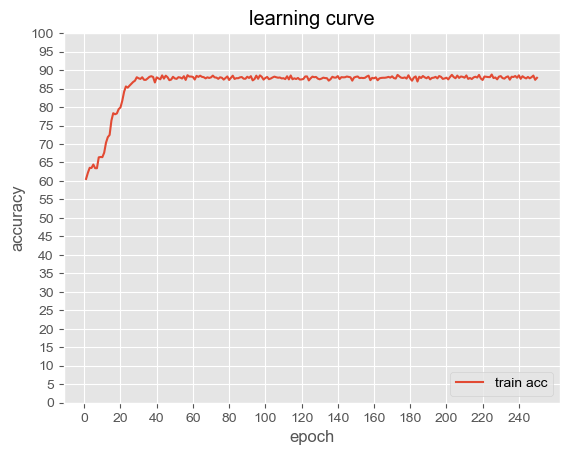

In [21]:

def learning_curve(record_train, record_test=None):
    plt.clf()
    plt.style.use("ggplot")

    plt.plot(range(1, len(record_train) + 1), record_train, label="train acc")
    # if record_test is not None:
    #     plt.plot(range(1, len(record_test) + 1), record_test, label="test acc")

    plt.legend(loc=4)
    plt.title("learning curve")
    plt.xticks(range(0, len(record_train) + 1, 20))
    plt.yticks(range(0, 101, 5))
    plt.xlabel("epoch")
    plt.ylabel("accuracy")
    plt.savefig('Train_Epoch_ACC.png')
learning_curve(record_train)

In [22]:
train_AUC = pd.read_csv('../output/temp_data/train_AUC.csv',index_col=0)

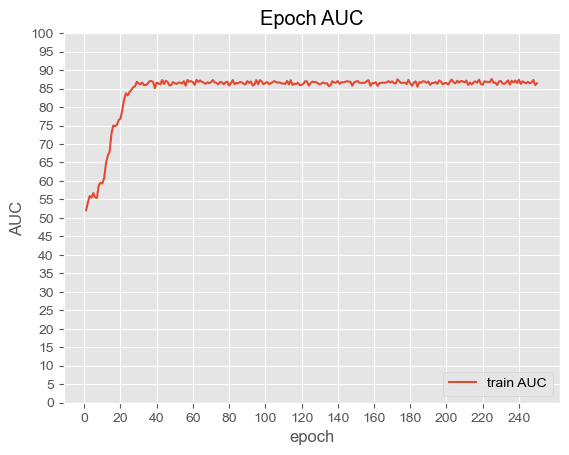

In [23]:
def plot_AUC(train_AUC, record_test=None):
    plt.clf()
    plt.style.use("ggplot")

    plt.plot(range(1, len(train_AUC) + 1), train_AUC, label="train AUC")
    # if record_test is not None:
    #     plt.plot(range(1, len(record_test) + 1), record_test, label="test acc")

    plt.legend(loc=4)
    plt.title("Epoch AUC")
    plt.xticks(range(0, len(train_AUC) + 1, 20))
    plt.yticks(range(0, 101, 5))
    plt.xlabel("epoch")
    plt.ylabel("AUC")
    # plt.savefig('ResNet50_last.png')
    plt.savefig('Train_Epoch_AUC.png')
plot_AUC(train_AUC)